In [1]:
#import required libraries
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
#loading the data set
iris=pd.read_csv('IRIS.csv')

In [5]:
# check the iris data
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
#let us explore the iris data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#from the above step we understand that data set contain 5 rows in which 4 are numerical and one is string type

In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# now in order to visualize the data we convert species column to numeric value by assigning numbers 1,2,3 to iris-setosa
#iris-versicolor and iris-virginica respectively
iris['species'] = iris['species'].map({'Iris-setosa': 1,'Iris-versicolor': 2,'Iris-virginica':3})

In [10]:
# let us check our new data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


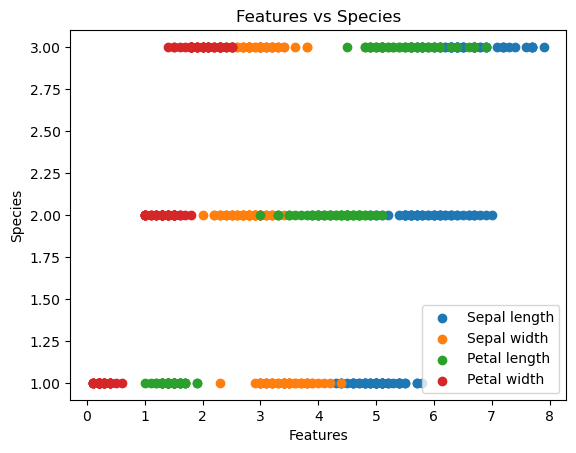

In [14]:
# Visualize relationships
#library for data visualization
import matplotlib.pyplot as plt
plt.scatter(iris['sepal_length'], iris['species'], label='Sepal length')
plt.scatter(iris['sepal_width'],iris['species'], label='Sepal width')
plt.scatter(iris['petal_length'], iris['species'], label='Petal length')
plt.scatter(iris['petal_width'], iris['species'], label='Petal width')
plt.xlabel('Features')
plt.ylabel('Species')
plt.title('Features vs Species')
plt.legend()
plt.show()

In [15]:
# let us split the data into target ie species and variable ie features

In [18]:
x=iris.drop('species',axis=1)
y=iris['species']
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.15)

In [20]:
#now we choose regression model to fit and train the data
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# Make predictions
predictions = model.predict(x_test)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9565217391304348


In [27]:
# Predict sales for new data
new_data = pd.DataFrame({
    'sepal_length': [1.1],
    'sepal_width': [0.9],
    'petal_length': [2.3],
    'petal_width':[1.7]
})

pred_spe = model.predict(new_data)
if pred_spe==1:
    print('Iris-Setosa')
elif pred_spe==2:
    print('Iris-Versicolor')
elif pred_spe==3:
    print('Iris-Virginica')
else:
    print("data is out of range")



Iris-Setosa


In [26]:
# Predict sales for new data
new_data = pd.DataFrame({
    'sepal_length': [5],
    'sepal_width': [3],
    'petal_length': [5],
    'petal_width':[1]
})

pred_spe = model.predict(new_data)
if pred_spe==1:
    print('Iris-Setosa')
elif pred_spe==2:
    print('Iris-Versicolor')
elif pred_spe==3:
    print('Iris-Virginica')
else:
    print("data is out of range")


Iris-Versicolor


In [28]:
# since we mapped species with numbers we get target values aS 1,2,3 we need to change them and print the name of species

In [29]:
new_data = pd.DataFrame({
    'sepal_length': [2],
    'sepal_width': [3],
    'petal_length': [4],
    'petal_width':[3]
})

pred_spe = model.predict(new_data)
if pred_spe==1:
    print('Iris-Setosa')
elif pred_spe==2:
    print('Iris-Versicolor')
elif pred_spe==3:
    print('Iris-Virginica')
else:
    print("data is out of range")

Iris-Versicolor
